In [8]:
import sys 
sys.path.append('../helper')
import math
import numpy as np
import random
import matplotlib.pyplot as plt
import pandas as pd
import RotationMatrix

In [9]:
n_points = 1000

In [10]:
# sample random points and apply rotation
random.seed(234)
points = []
for _ in range(n_points):
    alpha_p1 = random.uniform(0, 2*math.pi)
    x1, y1 = RotationMatrix.apply_rotation(1, 0, alpha_p1)
    x2, y2 = RotationMatrix.apply_rotation(x1, y1)
    points.append([x1, y1, x2, y2])
points = pd.DataFrame(points, columns=["x1", "y1", "x2", "y2"])

In [11]:
points.head()

,x1,y1,x2,y2
0,-0.545621,0.838032,-0.978391,0.206765
1,0.664113,-0.747632,0.998255,-0.059057
2,0.627280,-0.778793,0.994244,-0.107136
3,0.886203,-0.463297,0.954241,0.299039
4,-0.999402,-0.034592,-0.682224,-0.731144


In [12]:
points.to_csv("rotated_points.csv", index=False)

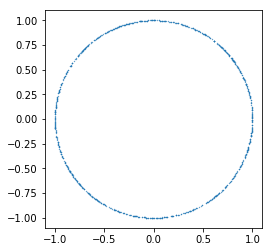

In [13]:
plt.scatter(points["x1"], points["y1"], 0.1)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

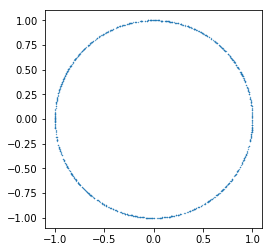

In [14]:
plt.scatter(points["x2"], points["y2"], 0.1)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

# Create dataset with angle

In [15]:
# sample random points and apply rotation
random.seed(234)
points = []
for _ in range(n_points):
    alpha_p1 = random.uniform(0, 2*math.pi)
    x1, y1 = RotationMatrix.apply_rotation(1, 0, alpha_p1)
    alpha_rotation = random.uniform(0, 2*math.pi)
    x2, y2 = RotationMatrix.apply_rotation(x1, y1, alpha_rotation)
    points.append([alpha_rotation, x1, y1, x2, y2])
points = pd.DataFrame(points, columns=["alpha", "x1", "y1", "x2", "y2"])

In [16]:
points.head()

,alpha,x1,y1,x2,y2
0,5.438695,-0.545621,0.838032,0.264186,0.964472
1,5.801473,0.627280,-0.778793,0.195085,-0.980786
2,3.019100,-0.999402,-0.034592,0.996140,-0.087781
3,5.976845,0.828136,-0.560527,0.620542,-0.784173
4,2.178330,0.979987,-0.199063,-0.395977,0.918260


In [17]:
points.to_csv("rotated_points_angle.csv", index=False)

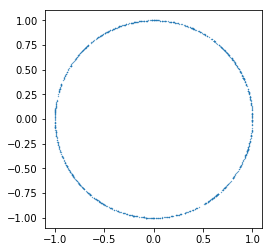

In [18]:
plt.scatter(points["x1"], points["y1"], 0.1)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

## Create test dataset with angle

In [19]:
# build test set
n_test_start_points = 16
n_test_angles = 17
test_data = []
for alpha_point in np.linspace(0, 2*math.pi, n_test_start_points+1)[:-1]:
    for alpha_rotation in np.linspace(0, 2*math.pi, n_test_angles):
        x1, y1 = RotationMatrix.apply_rotation(1, 0, alpha_point)
        x2, y2 = RotationMatrix.apply_rotation(x1, y1, alpha_rotation)
        test_data.append([alpha_rotation, x1, y1, x2, y2])
test_data = pd.DataFrame(test_data, columns=['alpha', 'x1', 'y1', 'x2', 'y2'])
test_data.to_csv("test.csv", index=False)